# **Exploring cell types across species using atlasapprox**

Understanding where a cell type exists, its marker genes, and its relationships with other cell types is fundamental to single-cell analysis. The [Atlasapprox API](https://atlasapprox.readthedocs.io/en/latest/python/index.html) provides access to cell atlas data across 30 species, including humans, mice, fish, plants, and worms.

This tutorial will guide you through querying cell type data for any species, using human examples where needed. You’ll learn to:

- Find where a cell type is located across different organs.
- Retrieve all cell types present in a specific organ.
- Generate a cell type × organ presence matrix.
- Identify marker genes for a specific cell type.
- Find cell types most similar to a given one.
- Visualize results using tables and heatmaps.

### Contents
- Retrieving the location of a specific cell type
- Retrieving the abundance of a specific cell type in a species of interest

## **Before you begin**

Before diving into this tutorial, make sure you have atlasapprox installed and properly set up. If you haven’t done so, please check the Quick Start Guide for installation instructions and API initialization.

Additionally, install the required packages if you haven't already:

In [ ]:
pip install pandas matplotlib seaborn

## **Setting up the API**

First, install and import the required packages.

In [ ]:
import atlasapprox
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the API
api = atlasapprox.API()

For complete setup instructions, see the [Quick Start Tutorial](https://github.com/Amber-Xu914/atlasapprox_api_tutorials/blob/main/python/quick_start.ipynb).

## **Retrieving the location of a specific cell type**

Cellular diversity is a crucial foundation for species diversity. It provides both the physiological and genetic basis that allows species to thrive in various environments. If you're interested in a specific cell type and want to gather information about it, you can create a table that shows the organisms in which it can be found, and the corresponding organs.

To get started, try running the following code to retrieve a list of available organisms from api:

In [6]:
organisms = api.organisms(measurement_type = 'gene_expression')
organisms

{'gene_expression': ['a_queenslandica',
  'a_thaliana',
  'c_elegans',
  'c_gigas',
  'c_hemisphaerica',
  'c_intestinalis',
  'd_melanogaster',
  'd_rerio',
  'f_vesca',
  'h_miamia',
  'h_sapiens',
  'h_vulgaris',
  'i_pulchra',
  'l_minuta',
  'm_leidyi',
  'm_murinus',
  'm_musculus',
  'n_vectensis',
  'o_sativa',
  'p_crozieri',
  'p_dumerilii',
  's_lacustris',
  's_mansoni',
  's_mediterranea',
  's_pistillata',
  's_purpuratus',
  't_adhaerens',
  't_aestivum',
  'x_laevis',
  'z_mays']}

This method returns a dictionary where the key represents the measurement type, paired with a list of available organisms from the API.

Next, try using the `celltype_location` method, which will return a list of organs where the target cell type can be found. At the same time,  store all the information in a dictionary for future use:

In [15]:
# Initialize an empty dictionary to store cell location data for each organism
cell_location_dict = {}

# Traverse through organisms and store their corresponding organ data in the dictionary
# Pair each organism with its corresponding cell location data for dendritic cells
for key, my_list in organisms.items():
    for organism_key in my_list:
        T_cell_location = api.celltype_location(
            organism=organism_key, 
            cell_type='dendritic', 
            measurement_type='gene_expression'
        )
        cell_location_dict[organism_key] = T_cell_location

# Remove entries from the dictionary where the cell location data is empty
cell_location_dict = { k: v for k, v in cell_location_dict.items() if v } # Keep only non-empty sets/lists

cell_location_dict

{'h_sapiens': ['blood',
  'eye',
  'liver',
  'lung',
  'lymphnode',
  'skin',
  'spleen',
  'thymus',
  'tongue'],
 'm_murinus': ['bladder',
  'blood',
  'bone',
  'fat',
  'gut',
  'kidney',
  'liver',
  'lung',
  'mammary',
  'marrow',
  'pancreas',
  'skin',
  'spleen',
  'tongue'],
 'm_musculus': ['lung']}

Now that everything is prepared for the new table, try running the following code to generate a clear and well-organized table:

In [16]:
# Get all unique organs
all_organs = set().union(*cell_location_dict.values())  

# Prepare the data for the new pandas DataFrame
result = pd.DataFrame(
    {organism: [organ in cell_location_dict[organism] for organ in all_organs]
     for organism in cell_location_dict},
    index=list(all_organs)
)

# Display the final pandas DataFrame
result

,h_sapiens,m_murinus,m_musculus
kidney,False,True,False
liver,True,True,False
lung,True,True,True
tongue,True,True,False
skin,True,True,False
bone,False,True,False
thymus,True,False,False
pancreas,False,True,False
fat,False,True,False
marrow,False,True,False


#### Output
This method returns a *Pandas DataFrame* where:

* Each row represents a organ.
* Each column corresponds to a organism.
* If the corresponding location contains the cell type of interest, it will display True; otherwise, it will show False.

## **Visualize cell type abundance**

Zooming into a specific species allows for a more detailed analysis of cell type abundance, which is crucial for understanding the organism's biological processes and overall health. To assist with this, the following example demonstrates a simple method for visualising cell type abundance data for a selected species.

In this case, human is chosen as the example. You can begin by obtaining summarized lists. Try the following code to retrieve a list that shows all the available cell types across human organs:

In [19]:
# Define organism
organism = 'h_sapiens'

# Prepare organ list
organs_list = api.organs(
        organism=organism, 
        measurement_type='gene_expression'
        )

# Show the lists contain all available cell types.
for item in organs_list:
        celltype = api.celltypes(
                organism=organism, 
                organ=item, 
                measurement_type='gene_expression'
        )
        print(f"Available cell types in {organism}'s {item}: ")
        print(celltype)

Available cell types in h_sapiens's bladder: 
['mast', 'macrophage', 'B', 'plasma', 'T', 'NK', 'plasmacytoid', 'urothelial', 'venous', 'capillary', 'lymphatic', 'fibroblast', 'smooth muscle', 'pericyte']
Available cell types in h_sapiens's blood: 
['HSC', 'neutrophil', 'basophil', 'myeloid', 'monocyte', 'macrophage', 'dendritic', 'erythrocyte', 'B', 'plasma', 'T', 'NK', 'plasmacytoid', 'platelet']
Available cell types in h_sapiens's colon: 
['neutrophil', 'mast', 'monocyte', 'B', 'plasma', 'T', 'goblet', 'brush', 'crypt', 'transit amp', 'enterocyte', 'paneth', 'venous', 'capillary', 'fibroblast', 'enteroendocrine']
Available cell types in h_sapiens's eye: 
['mast', 'monocyte', 'macrophage', 'dendritic', 'erythrocyte', 'B', 'plasma', 'T', 'glial', 'acinar', 'melanocyte', 'conjunctival', 'corneal', 'capillary', 'fibroblast', 'keratocyte', 'adipocyte', 'neuron', 'photoreceptor', 'muller', 'limbal', 'lacrimal', 'retinal pigment', 'horizontal', 'ganglion']
Available cell types in h_sapiens'

You can also make the data more obvious. Try the following code to create a bar chart. First, call the `celltypexorgan` method to get the full cell type abundance table:

In [ ]:
table = api.celltypexorgan(
        organism=organism, 
        measurement_type='gene_expression', 
        boolean=False
        )

table

organs,bladder,blood,colon,eye,fat,gut,heart,kidney,liver,lung,...,muscle,pancreas,prostate,salivary,skin,spleen,thymus,tongue,trachea,uterus
cell types,,,,,,,,,,,,,,,,,,,,,
T,2916,7070,5019,268,1715,7580,0,422,146,1307,...,1164,573,1922,3609,2188,8274,10605,832,666,546
macrophage,5338,488,0,108,2807,0,74,321,1381,12160,...,1989,0,317,1761,882,1335,461,325,541,344
B,253,3093,497,102,23,519,0,341,0,87,...,0,144,0,4136,16,7504,4638,13,462,10
fibroblast,5557,0,953,95,8459,113,250,0,76,385,...,3190,47,223,2611,754,0,3924,251,1488,3014
plasma,1141,498,330,46,26,303,0,0,34,134,...,0,63,0,345,24,3171,1554,0,138,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
horizontal,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
keratinocyte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3667,0,0
keratocyte,0,0,0,595,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Output
This method returns a *pandas.DataFrame* where:
- Each row represents a cell type.
- Each column corresponds to an organ.
- The values indicate the number of sampled cells/nuclei (with parameter boolean=False)

Then, try the following code to extract the useful data from the table and convert it into a bar chart:

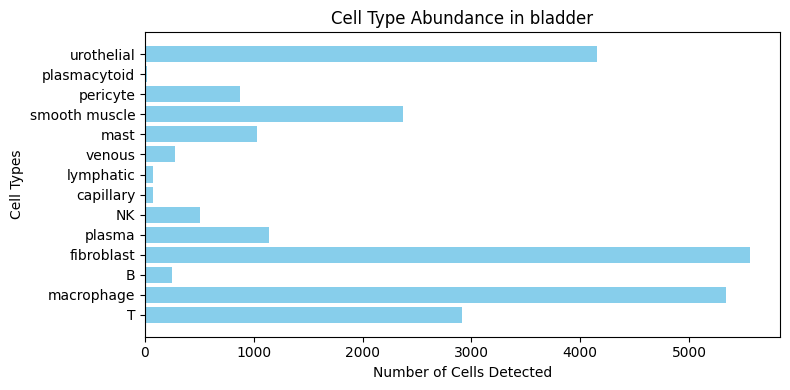

In [37]:
# define organ of interest
organ = 'bladder'
# Extract data for the specified organ (bladder in this case)
organ_data = table[organ]

# Remove rows where the values are zero
organ_data = organ_data[organ_data != 0]

# Extract the corresponding cell types (row index)
cell_types = organ_data.index

# Create a horizontal bar plot
plt.figure(figsize=(8, 4))  # Set the figure size
plt.barh(cell_types, organ_data, color='skyblue')  # Plot the horizontal bar chart
plt.ylabel('Cell Types', fontsize=10)  # Set the y-axis label
plt.xlabel('Number of Cells Detected', fontsize=10)  # Set the x-axis label
plt.title(f'Cell Type Abundance in {organ}', fontsize=12)  # Set the chart title
plt.tight_layout()  # Adjust layout to prevent label overlap

plt.show()

#### Output
This code returns a *bar chart* where:
- x-axis shows the number of cells detected.
- y-axis represent the different cell types.

This bar chart illustrates the distribution of 14 different cell types in the human bladder. You can see the fibroblast cell type is the most abundant with a significant number of cells detected. In contrast, other cell types such as plasmacytoid and pericyte are represented in much lower quantities. This indicates a relatively lower abundance of these cell types in the bladder compared to fibroblasts.